In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pytz
import statistics

In [136]:
df = pd.read_csv('../Improve_Detroit_Issues.csv', dtype = {'reopened_at':'str', 'neighborhood':'str'})
df = df.drop_duplicates(subset = 'id')
df.head()

,X,Y,id,status,request_type_title,description,web_url,report_method,priority_code,created_at,acknowledged_at,closed_at,reopened_at,updated_at,days_to_close,canonical_issue_id,address,neighborhood,council_district,oid
0,NaN,NaN,10014644,Open,Abandoned Vehicle,Redacted,https://seeclickfix.com/issues/10014644,direct,2,2021/05/28 04:12:07+00,NaN,NaN,NaN,2021/05/28 04:12:07+00,NaN,NaN,Redacted,NaN,NaN,1
41,-83.039212,42.386152,10014457,Open,Street Light Out,street lights are dim / the yellow defective k...,https://seeclickfix.com/issues/10014457,direct,2,2021/05/28 03:35:08+00,NaN,NaN,NaN,2021/05/28 03:35:09+00,NaN,NaN,"5555 Conant St Detroit, MI 48211, USA",NaN,NaN,42
82,-83.058072,42.342364,10014199,Open,Potholes,Pothole,https://seeclickfix.com/issues/10014199,direct,2,2021/05/28 02:23:44+00,NaN,NaN,NaN,2021/05/28 02:23:52+00,NaN,NaN,"2906 Cass Ave Detroit MI 48201, United States",NaN,NaN,83
123,-83.204602,42.348446,10014182,Open,Vacant Lot Cutting,I asked needs to be cut is very long,https://seeclickfix.com/issues/10014182,direct,2,2021/05/28 02:13:42+00,NaN,NaN,NaN,2021/05/28 02:14:39+00,NaN,NaN,"7700 Mettetal St Detroit, MI, 48228, USA",NaN,NaN,124
164,-83.260260,42.412897,10014396,Acknowledged,Investigate Running Water Vacant Property,This request was submitted to the Detroit Wate...,https://seeclickfix.com/issues/10014396,direct,2,2021/05/28 02:13:39+00,2021/05/28 03:07:35+00,NaN,NaN,2021/05/28 03:07:35+00,NaN,NaN,22244 Grove St Detroit 48219,NaN,NaN,165


In [137]:
closed_at_na = df.loc[df["closed_at"].isna()]
valid_closed_at = df.loc[df["closed_at"].notna()]
closed_at_na.tail()
valid_closed_at.tail()

,X,Y,id,status,request_type_title,description,web_url,report_method,priority_code,created_at,acknowledged_at,closed_at,reopened_at,updated_at,days_to_close,canonical_issue_id,address,neighborhood,council_district,oid
633340,-82.949184,42.388343,1196866,Archived,Running Water in a Home or Building,flooding,https://seeclickfix.com/issues/1196866,direct,2,2014/07/21 17:43:46+00,2014/07/21 21:03:33+00,2014/07/22 04:19:26+00,NaN,2014/07/22 04:19:26+00,0.441435,NaN,"3786 Ashland Detroit, Michigan",Fox Creek,4.0,633341
633341,-82.944731,42.398793,1196857,Archived,Running Water in a Home or Building,vacant flooding,https://seeclickfix.com/issues/1196857,direct,2,2014/07/21 17:37:05+00,2014/07/21 21:04:10+00,2014/07/28 14:24:58+00,NaN,2014/07/28 14:24:58+00,6.866586,NaN,"4813 Chatsworth Detroit, Michigan",Morningside,4.0,633342
633342,-82.948944,42.400823,1196832,Archived,Running Water in a Home or Building,Flooding,https://seeclickfix.com/issues/1196832,direct,2,2014/07/21 17:19:27+00,2014/07/21 21:04:53+00,2014/07/22 00:07:14+00,NaN,2014/07/22 00:07:14+00,0.283183,NaN,"5107 Somerset Detroit, Michigan",Morningside,4.0,633343
633343,-83.108376,42.332218,1192634,Archived,Running Water in a Home or Building,Leaking in crawl space,https://seeclickfix.com/issues/1192634,direct,2,2014/07/19 01:31:57+00,2014/07/19 04:44:40+00,2014/07/20 03:34:49+00,NaN,2020/08/11 21:19:38+00,NaN,NaN,"4553 Bangor Street Detroit, MI 48210, USA",NaN,NaN,633344
633345,-83.090376,42.343280,1186066,Archived,Running Water in a Home or Building,"From the street, you can hear the water flowin...",https://seeclickfix.com/issues/1186066,direct,2,2014/07/15 21:14:16+00,2014/07/15 21:43:00+00,2014/07/16 11:24:42+00,NaN,2019/12/19 23:32:18+00,NaN,NaN,"Buchanan And Humboldt Detroit, Michigan",NaN,NaN,633346


In [138]:

timezone = pytz.timezone("America/Detroit")
now = timezone.localize(pd.Timestamp.now())
closed_at_na["time_to_present"] = (now-pd.to_datetime(closed_at_na["created_at"])).dt.days
valid_closed_at["time_to_present"] = (now-pd.to_datetime(valid_closed_at["created_at"])).dt.days

/var/folders/07/k5n8ysdj0x7g4y_gv6tpmzsc0000gn/T/ipykernel_84190/3929719857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_at_na["time_to_present"] = (now-pd.to_datetime(closed_at_na["created_at"])).dt.days
/var/folders/07/k5n8ysdj0x7g4y_gv6tpmzsc0000gn/T/ipykernel_84190/3929719857.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_closed_at["time_to_present"] = (now-pd.to_datetime(valid_closed_at["created_at"])).dt.days


array([[<AxesSubplot:title={'center':'time_to_present'}>]], dtype=object)

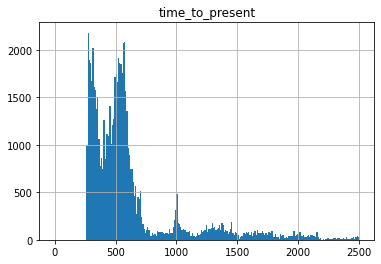

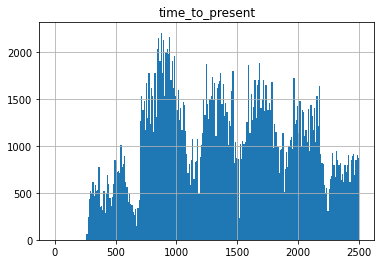

In [139]:
bins = []
for i in range(0, 2510, 10):
    bins.append(i)
closed_at_na.hist(column='time_to_present', bins=bins)
valid_closed_at.hist(column='time_to_present', bins=bins)

/var/folders/07/k5n8ysdj0x7g4y_gv6tpmzsc0000gn/T/ipykernel_84190/717342352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_at_na.dropna(subset=['neighborhood','council_district'], inplace=True)


array([[<AxesSubplot:title={'center':'time_to_present'}>]], dtype=object)

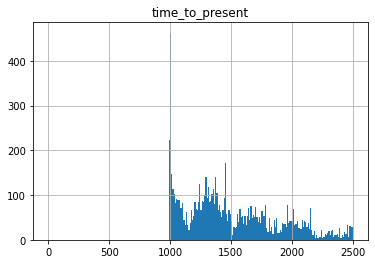

In [140]:
closed_at_na.dropna(subset=['neighborhood','council_district'], inplace=True)
closed_at_na.hist(column='time_to_present', bins=bins)

In [141]:
closed_at_na['council_district'].value_counts()

7.0    1401
6.0    1300
5.0    1212
1.0    1043
4.0    1027
2.0     989
3.0     961
Name: council_district, dtype: int64

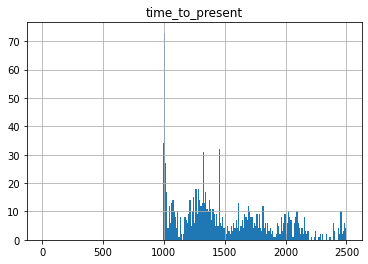

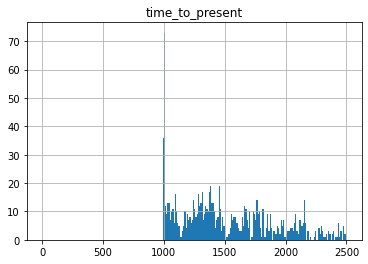

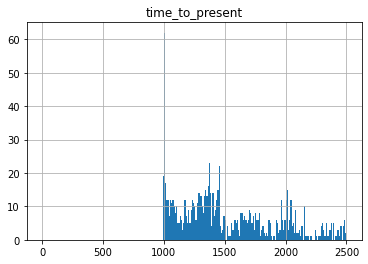

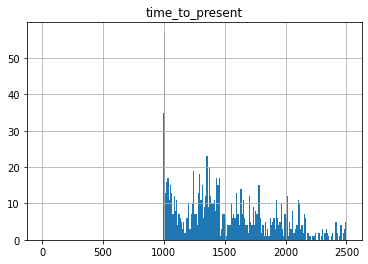

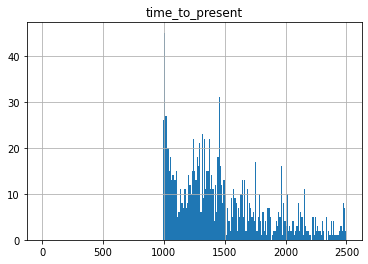

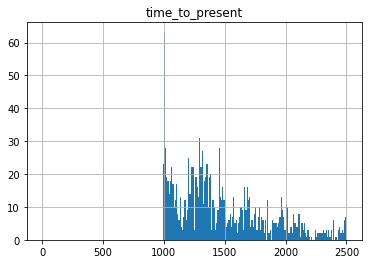

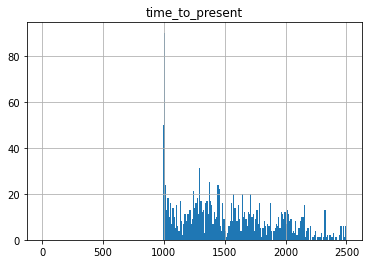

In [142]:
for i in range(1,8):
    closed_at_na.loc[closed_at_na["council_district"]==i].hist(column='time_to_present', bins=bins)


In [143]:
nbs = df['neighborhood'].unique()
nbs_list = []
for i in nbs:
    nbs_list.append(i)
nbs_list.pop(0)

rqt = df['request_type_title'].unique()
rqt_list = []
for i in rqt:
    rqt_list.append(i)

In [144]:
nb_total = []
for i in nbs_list:
    nb_total.append(df['neighborhood'].value_counts()[i])
# print(nb_total)
rqt_total = []
for i in rqt_list:
    rqt_total.append(df['request_type_title'].value_counts()[i])

In [150]:
nb_ctime_na = []
for i in nbs_list:
    if i in closed_at_na['neighborhood'].unique():
        nb_ctime_na.append(closed_at_na['neighborhood'].value_counts()[i])
    else:
        nb_ctime_na.append(0)
# print(nb_ctime_na)
rqt_na = []
for i in rqt_list:
    if i in closed_at_na['request_type_title'].unique():
        rqt_na.append(closed_at_na['request_type_title'].value_counts()[i])
    else:
        rqt_na.append(0)

stdev =  0.0192
mean is =  0.0523
median is =  0.0493


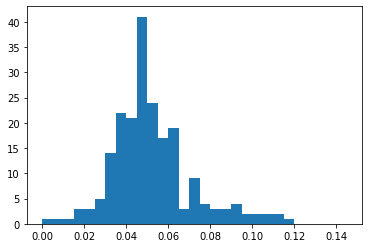

In [155]:
nb_bins = []
c = 0
while c <= 0.15:
    nb_bins.append(c)
    c += 0.005

rqt_bins = []
c = 0
while c <= 0.5:
    rqt_bins.append(c)
    c+= 0.005

# print(nb_bins)
nb_ctime_na_perc = []
for i in range(len(nbs_list)):
    nb_ctime_na_perc.append(nb_ctime_na[i]/nb_total[i])

rqt_na_perc = []
for i in range(len(rqt_list)):
    rqt_na_perc.append(rqt_na[i]/rqt_total[i])

plt.hist(nb_ctime_na_perc,bins=nb_bins)
print("stdev = ",round(statistics.stdev(nb_ctime_na_perc), 4))
print("mean is = ", round(statistics.mean(nb_ctime_na_perc), 4))
print("median is = ", round(statistics.median(nb_ctime_na_perc), 4))




stdev =  0.102
mean is =  0.0473
median is =  0.0058


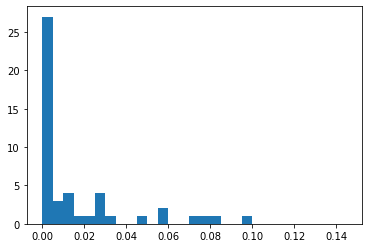

In [156]:
plt.hist(rqt_na_perc, bins=nb_bins)
print("stdev = ",round(statistics.stdev(rqt_na_perc), 4))
print("mean is = ", round(statistics.mean(rqt_na_perc), 4))
print("median is = ", round(statistics.median(rqt_na_perc), 4))

In [161]:
for i in range(len(rqt_list)):
    if (rqt_na_perc[i] > 0.05):
        print( rqt_na_perc[i], rqt_na[i], rqt_list[i])

0.38209606986899564 700 Other - Referred to other City Department
0.05747126436781609 105 Squatters Issue
0.5350140056022409 573 Other - Not within City jurisdiction
0.16666666666666666 4 Cemetery Issue
0.07539682539682539 19 Street Light / Street Light Pole Major Repair
0.3020833333333333 29 Alley Grading - DPW Use Only
0.22 22 Other - Not within scope of City services
0.1 2 Vacant Service Leak
0.1734412184673965 1822 Blocked Catch Basin
0.0726757904672015 154 Manhole Cover Issue
0.05519604111153407 145 Fire Hydrant Issue
0.0815024805102764 345 Water Main Break
